In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## CCLE

## Description

This CCLE dataset is made by performing the usual bulk RNA-seq technique, then normalizing using RPKM (Reads Per Kilobase of transcript per Million) to reduce variance and make samples comparable.

The RPKM normalization solves two problems created during sequencing:

1. **Sequencing depth**, which happens when samples are sequenced to different depths. Some samples may have more or fewer total reads, but that difference does not reflect biology, so we correct for it.  
2. **Gene length**, because longer genes generate more reads just by being longer, and shorter genes fewer reads. Normalizing by gene length accounts for that.

The normalized (i, j) RPKM value, where (i) is a gene and (j) is a sample, is:

$$
\mathrm{RPKM}_{i,j}
=
\frac{x_{i,j}}{\,l_i \cdot \sum_k x_{k,j}\,}
\times 10^6
$$

<!-- blank line above is important -->
- **$x_{i,j}$** is the raw read count for gene \(i\) in sample \(j).  
- **$l_i$** is the length of gene \(i\) in kilobases (kb).  
- **$\sum_{k} x_{k,j}$** is the total number of reads in sample \(j\).  

In [3]:
# mRNA seq
# Expression Data with gene as index and cells/samples as columns
data_mrna_seq_rpkm = pd.read_csv('ccle_data/data_mrna_seq_rpkm.txt',
                    sep = '\t',
                    comment = '#')

data_mrna_seq_rpkm.set_index('Hugo_Symbol',inplace=True)
print(f"Shape before merging duplicated rows: {data_mrna_seq_rpkm.shape}")

# Merge with mean duplicated rows
data_mrna_seq_rpkm = data_mrna_seq_rpkm.groupby(data_mrna_seq_rpkm.index).mean()
print(f"Shape after merging duplicated rows: {data_mrna_seq_rpkm.shape}")


Shape before merging duplicated rows: (56318, 1156)
Shape after merging duplicated rows: (54353, 1156)


In [4]:
data_mrna_seq_rpkm.head()

,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,UMUC16_URINARY_TRACT,UMUC4_URINARY_TRACT,UMUC5_URINARY_TRACT,UMUC6_URINARY_TRACT,UMUC7_URINARY_TRACT,UMUC9_URINARY_TRACT,UPCISCC152_UPPER_AERODIGESTIVE_TRACT,UW228_CENTRAL_NERVOUS_SYSTEM,Y79_AUTONOMIC_GANGLIA,YAMATO_SOFT_TISSUE
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
CRIPTOP1,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7SK,0.029785,0.03377,0.047608,0.02094,0.00430,0.017847,0.006893,0.00704,0.008042,0.148955,...,0.083175,0.02683,0.002032,0.024993,0.094365,0.393628,0.035012,0.002465,0.05875,0.067953
A1BG,0.362300,0.00608,0.115170,0.33737,3.06452,0.013390,2.180160,2.24186,0.095400,3.698050,...,0.012700,0.09324,0.011340,0.060090,0.026380,0.019230,0.505580,0.578600,0.71115,0.849120
A1BG-AS1,4.815880,0.18959,0.751510,1.32578,9.15532,0.064590,1.619220,4.48351,0.631410,6.483210,...,0.371360,0.52954,0.187460,0.121010,0.359240,0.809130,2.750650,2.918060,2.06849,2.596400
A1CF,5.654860,2.55482,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,4.12239,0.000000,0.000000,0.000000,0.000000,0.000000,0.011540,0.00589,0.000000


In [5]:
# Transpose the data matrix to have a sample for each row
data_t = data_mrna_seq_rpkm.T
data_t.head()

Hugo_Symbol,CRIPTOP1,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,...,snoZ13_snr52,snoZ178,snoZ185,snoZ247,snoZ40,snoZ5,snoZ6,snosnR60_Z15,snosnR66,yR211F11.2
22RV1_PROSTATE,0.0,0.029785,0.36230,4.81588,5.65486,1.98954,1.27348,0.01960,0.91070,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.341940,0.0,0.0,0.0755
2313287_STOMACH,0.0,0.033770,0.00608,0.18959,2.55482,0.00782,0.22274,0.01738,0.32801,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.239685,0.0,0.0,0.0000
253JBV_URINARY_TRACT,0.0,0.047608,0.11517,0.75151,0.00000,0.05044,0.00000,0.00544,0.60473,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000
253J_URINARY_TRACT,0.0,0.020940,0.33737,1.32578,0.00000,0.02878,0.00000,0.00547,0.46686,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000
42MGBA_CENTRAL_NERVOUS_SYSTEM,0.0,0.004300,3.06452,9.15532,0.00000,0.02477,0.00000,0.00000,0.09900,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000913,0.0,0.0,0.0000


In [6]:
# Mutations matrix
# it tells the type of mutation: WT (wild type) or else (actual mutation)
mutations= pd.read_csv('ccle_data/mutations.txt',
                    sep = '\t',
                    comment = '#')
mutations.set_index('SAMPLE_ID',inplace=True)
print(f"Mutations dataframe shape: {mutations.shape}")

Mutations dataframe shape: (1570, 2)


In [7]:
mutations.head()

,STUDY_ID,TP53
SAMPLE_ID,,
SJRH30_SOFT_TISSUE,ccle_broad_2019,R280S R273C Y205C
FADU_UPPER_AERODIGESTIVE_TRACT,ccle_broad_2019,R248L X225_splice
HH_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ccle_broad_2019,X187_splice
SKNMC_BONE,ccle_broad_2019,WT
SNU182_LIVER,ccle_broad_2019,S215I


## Multi-class prediction: which classes to consider?
We decided to use the `Variant_Type` classes (SNP, DNP, DEL, INS) as prediction targets for our classification task. The main reason is that we only have around 1,000+ samples in total, while each sample contains over 50,000+ gene expression levels. This creates a high-dimensional, low-sample-size scenario, which makes it important to simplify the prediction task to avoid overfitting and reduce noise.

The `Variant_Classification` column contains many more categories, which would require more data to model accurately. In contrast, `Variant_Type` has only four well-defined mutation types (plus the Wild Type), making it more suitable for classification in our setting. These types are biologically meaningful and still capture key differences in mutation patterns. By focusing on `Variant_Type`, we ensure a more balanced and manageable classification problem given the size and structure of our dataset.

The mutation types in `Variant_Type` are:

- **SNP (Single Nucleotide Polymorphism)**: a single base pair in the DNA sequence is changed.
- **DNP (Double Nucleotide Polymorphism)**: two adjacent base pairs are changed.
- **DEL (Deletion)**: one or more nucleotides are deleted from the DNA sequence.
- **INS (Insertion)**: one or more nucleotides are inserted into the DNA sequence.

In [8]:
# Data mutations matrix
# Dataset containing mutation classes for all genes, contining only mutated samples
data_mutations = pd.read_csv('ccle_data/data_mutations.txt',
                    sep = '\t',
                    comment = '#')

# Extract TP53 from all genes
data_mutations = data_mutations[data_mutations['Hugo_Symbol'] == 'TP53']

In [9]:
unique_labels_vc = data_mutations['Variant_Classification'].unique()
print(f"{len(unique_labels_vc)} different classes: {unique_labels_vc}")

9 different classes: ['Missense_Mutation' 'Nonsense_Mutation' 'Splice_Site' 'Silent'
 'Splice_Region' 'Frame_Shift_Del' 'Frame_Shift_Ins' 'In_Frame_Del'
 'In_Frame_Ins']


In [10]:
unique_labels_vt = data_mutations['Variant_Type'].unique()
print(f"{len(unique_labels_vt)} different classes: {unique_labels_vt}")

4 different classes: ['SNP' 'DNP' 'DEL' 'INS']


In [11]:
# Remove unwanted information
data_mutations = data_mutations[['Tumor_Sample_Barcode', 'Variant_Type']]
data_mutations.set_index('Tumor_Sample_Barcode', inplace=True)

# There are repetitions of my mutation type (Variant_Type)
# if there is the same sample with different Variant_Type it should be removed
variant_check = data_mutations.groupby(data_mutations.index)["Variant_Type"].nunique()

In [12]:
data_mutations.head()

,Variant_Type
Tumor_Sample_Barcode,
22RV1_PROSTATE,SNP
A431_SKIN,SNP
A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SNP
BICR16_UPPER_AERODIGESTIVE_TRACT,SNP
BICR78_UPPER_AERODIGESTIVE_TRACT,SNP


## Class balance check

We check how many samples are in each class before training, because if one class is much larger the model can become biased toward it. A balanced dataset helps the model learn to recognize both classes equally.

In [13]:
class_names = ['WT','SNP','DNP','DEL','INS']
code = {"WT": 0, "SNP": 1, "DNP": 2, "DEL": 3, "INS": 4}
variant_map = data_mutations['Variant_Type'].to_dict()

class_counts = {
    "WT": 0,
    "SNP": 0,
    "DEL": 0,
    "INS": 0,
    "DNP": 0
}

for sample_id, mut_type in mutations['TP53'].items():
    if mut_type == 'WT':
        class_counts[mut_type] += 1
    else:
        class_counts[variant_map[sample_id]] += 1

print(class_counts)


{'WT': 571, 'SNP': 835, 'DEL': 111, 'INS': 34, 'DNP': 19}


## Build target vector and data matrix for classifier
To build an aligned data matrix X and a target vector y, we check if each sample in the mutations matrix has a correspondency in the original data matrix, and we discard the samples that don't have it.

In [14]:
# Target vector
y = []

# Data matrix
X_rows = []
sample_names = []

# Iterate over each mutation record
for sample_id, mut_type in mutations['TP53'].items():
    if (sample_id in data_t.index):
        # Grab the full row from data_t and store it
        X_rows.append(data_t.loc[sample_id].values)
        sample_names.append(sample_id)
        if mut_type == 'WT':
            y.append(code['WT'])
        else:
            y.append(code[variant_map[sample_id]])

# Build the new data matrix
X = pd.DataFrame(
    X_rows,
    index=sample_names,
    columns=data_t.columns
)

y = np.array(y)

print(f"Initial number of samples: {data_t.shape[0]}")
print(f"Number of samples discarded because of no correspondency in the data matrix: {data_t.shape[0] - X.shape[0]}")
print(f"Final number of samples available: {X.shape[0]}")

Initial number of samples: 1156
Number of samples discarded because of no correspondency in the data matrix: 30
Final number of samples available: 1126


In [15]:
# Print the shapes to make sure they are aligned
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1126, 54353)
y shape: (1126,)


## Train - Test set split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# 90% train, 10% test, stratify to preserve class balance
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y,
    test_size=0.1,
    random_state=10,
    stratify=y
)

print(f"Train shape:\n\tX_train: {X_train_np.shape}\n\ty_train: {y_train_np.shape}")
print(f"Test shape:\n\tX_test: {X_test_np.shape}\n\ty_test: {y_test_np.shape}")

Train shape:
	X_train: (1013, 54353)
	y_train: (1013,)
Test shape:
	X_test: (113, 54353)
	y_test: (113,)


In [18]:
# Check if Train - Test split is balanced in the number of classes
inv_code = {v: k for k, v in code.items()}
train_counts = {name: 0 for name in code.keys()}
test_counts = {name: 0 for name in code.keys()}

# Train
for mut in y_train_np:
    cls_name = inv_code[int(mut)]
    train_counts[cls_name] += 1

print("Train:")
for cls_name, count in train_counts.items():
    print(f"\t{cls_name} samples: {count}")

# Test
for mut in y_test_np:
    cls_name = inv_code[int(mut)]
    test_counts[cls_name] += 1

print("Test:")
for cls_name, count in test_counts.items():
    print(f"\t{cls_name} samples: {count}")

Train:
	WT samples: 340
	SNP samples: 560
	DNP samples: 10
	DEL samples: 81
	INS samples: 22
Test:
	WT samples: 38
	SNP samples: 63
	DNP samples: 1
	DEL samples: 9
	INS samples: 2


## Model selection and Training
We try three different classifiers for the task.

**Random forest** classifier: it is robust, accurate, and easy to use. It performs well with minimal preprocessing, handles high-dimensional data, and is resistant to overfitting thanks to its ensemble nature. Moreover, it can capture non-linear relationships and provides useful insights through feature importance scores, making it a strong and reliable choice for our classification task.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [20]:
# Function to perform hyperparameter search for Random forest classifier
def random_forest(X_train, y_train):
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['log2', 'sqrt']
    }

    grid_search_rf = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid_rf,
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search_rf.fit(X_train, y_train)

    best_params_rf = grid_search_rf.best_params_
    print("Best Random Forest Parameters:", best_params_rf)

    best_rf = grid_search_rf.best_estimator_
    return best_rf

In [21]:
# Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# best_rf = random_forest(X_train_np, y_train_np) # UNCOMMENT HERE FOR HYPERPARAM SEARCH

# Instantiate the model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train
best_rf.fit(X_train_np, y_train_np)

RandomForestClassifier(max_depth=20, random_state=42)

In [22]:
# Make predictions on test set
y_pred_rf = best_rf.predict(X_test_np)

# Evaluation
accuracy_rf = accuracy_score(y_test_np, y_pred_rf)
precision_rf = precision_score(y_test_np, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_np, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_np, y_pred_rf, average='weighted')

**XGBoost** classifier: very good performance and efficiency. XGBoost is a powerful gradient boosting algorithm that handles missing values, supports regularization to reduce overfitting, and is optimized for speed. It works well with structured data and often outperforms other models, making it a strong choice for our problem.

In [23]:
from xgboost import XGBClassifier

In [24]:
# XGBoost
def xgboost(X_train, y_train):
    param_grid_xgb_binary = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }


    xgb = XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )


    grid_search_xgb = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid_xgb_binary,
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search_xgb.fit(X_train, y_train)

    print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

    best_xgb = grid_search_xgb.best_estimator_
    return best_xgb

In [25]:
# Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5,
#  'n_estimators': 200, 'subsample': 1.0}

# best_xgb = xgboost(X_train_np, y_train_np) # UNCOMMENT HERE FOR HYPERPARAM SEARCH

# Instantiate the model with the best parameters
best_xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

# Train
best_xgb.fit(X_train_np, y_train_np)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [26]:
# Make predictions on test set
y_pred_xgb = best_xgb.predict(X_test_np)

# Evaluation
accuracy_xgb = accuracy_score(y_test_np, y_pred_xgb)
precision_xgb = precision_score(y_test_np, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_np, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_np, y_pred_xgb, average='weighted')

**Multi-Layer Perceptron** classifier: neural networks are known for their ability to model complex, non-linear relationships in the data. By tuning its architecture and training parameters through grid search, we aimed to find the best configuration for our task. MLPs are flexible, work well with structured data, and can learn patterns that simpler models might miss, making them a solid option for classification problems.

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
# Neural Network (MLP)
def neural_netw(X_train, y_train):
    param_grid_nn = {
        'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }

    grid_search_nn = GridSearchCV(
        estimator=MLPClassifier(max_iter=1000, random_state=42),
        param_grid=param_grid_nn,
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search_nn.fit(X_train, y_train)

    best_params_nn = grid_search_nn.best_params_
    print("Best Neural Network Parameters:", best_params_nn)

    best_nn = grid_search_nn.best_estimator_
    return best_nn

In [29]:
# Best Neural Network Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50),
# 'learning_rate': 'constant', 'solver': 'adam'}

# best_nn = neural_netw(X_train_np, y_train_np) # UNCOMMENT HERE FOR HYPERPARAM SEARCH

best_nn = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate='constant',
    max_iter=1000,
    random_state=42
)

# Train
best_nn.fit(X_train_np, y_train_np)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 50), max_iter=1000,
              random_state=42)

In [30]:
# Make predictions on test set
y_pred_nn = best_nn.predict(X_test_np)

# Evaluation
accuracy_nn = accuracy_score(y_test_np, y_pred_nn)
precision_nn = precision_score(y_test_np, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test_np, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test_np, y_pred_nn, average='weighted')

## Evaluation metrics
We evaluated all models using accuracy, precision, recall, and F1-score to provide a complete and balanced assessment of performance:

- **Accuracy** gives an overall measure of how many predictions were correct.
- **Precision (weighted)** helps understand how reliable the positive predictions are, while taking class imbalance into account.
- **Recall (weighted)** shows how well the model identifies all relevant instances for each class.
- **F1-score (weighted)** combines precision and recall into a single metric, balancing the two and adjusting for class distribution.

These metrics are especially important in multi-class settings with possible class imbalance, as they give more insight than accuracy alone. The use of weighted averages ensures that all classes contribute proportionally to the final scores.


In [31]:
# Show metrics
classifiers = [
    ("Random Forest", accuracy_rf, precision_rf, recall_rf, f1_rf),
    ("XGBoost", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb),
    ("Neural Network (MLP)", accuracy_nn, precision_nn, recall_nn, f1_nn)
]

for clf_name, accuracy, precision, recall, f1 in classifiers:
    print(f"{clf_name} Performance:")
    print(f"  Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}\n")

Random Forest Performance:
  Accuracy: 0.7522 | Precision: 0.6944 | Recall: 0.7522 | F1 Score: 0.7048

XGBoost Performance:
  Accuracy: 0.8142 | Precision: 0.7334 | Recall: 0.8142 | F1 Score: 0.7687

Neural Network (MLP) Performance:
  Accuracy: 0.5221 | Precision: 0.5229 | Recall: 0.5221 | F1 Score: 0.5200



## Confusion Matrices
We computed the confusion matrix for each model (Random Forest, XGBoost, and Neural Network) to analyze their classification performance in more detail. The confusion matrix shows how often each class was correctly or incorrectly predicted. It helps us identify specific types of errors, such as which classes are most often confused with one another.

This is especially useful in multi-class classification tasks, where accuracy alone might not reveal which classes are harder to distinguish. By comparing the confusion matrices, we can better understand the strengths and weaknesses of each model and identify patterns of misclassification.

In [32]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test_np, y_pred_rf)
cm_xgb = confusion_matrix(y_test_np, y_pred_xgb)
cm_nn = confusion_matrix(y_test_np, y_pred_nn)

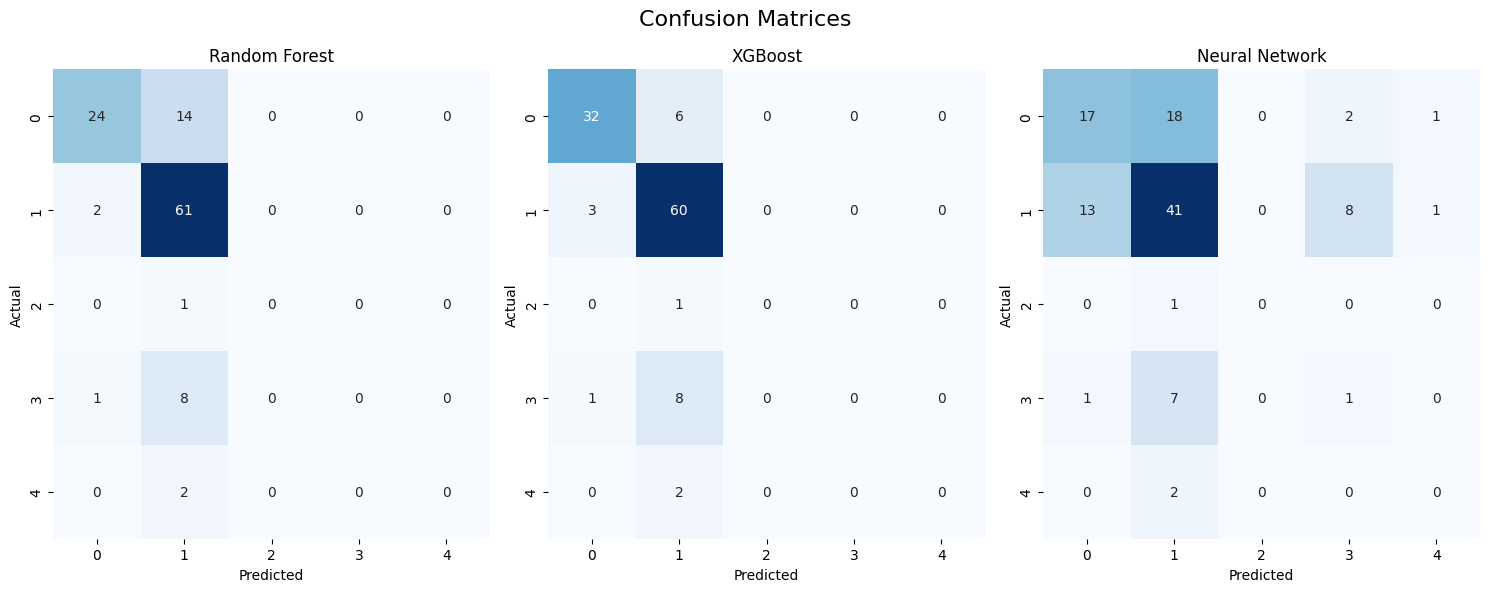

In [37]:
classifier_names = [
    'Random Forest', 'XGBoost', 'Neural Network'
]

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Confusion Matrices', fontsize=16)

axes = axes.ravel()

for i, (cm, name) in enumerate(zip(
    [cm_rf, cm_xgb, cm_nn],
    classifier_names
)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

**Results**

The confusion matrices show that the models are generally effective at distinguishing between the most frequent classes in the dataset, particularly class 0 and class 1. These classes are predicted with relatively high accuracy, with most of their test samples being correctly classified. However, the models struggle significantly with the less frequent classes (2, 3, and 4). These classes are either misclassified as one of the dominant classes or not predicted at all.

This behavior is typical in imbalanced multi-class classification settings, where the models tend to favor the majority classes during training. As a result, they learn to identify well-represented classes while failing to capture patterns associated with under-represented ones. The confusion matrices clearly reflect this imbalance: the rare classes are often absorbed into predictions of the more common ones, leading to very few or no correct predictions for those classes.

Overall, while the classifiers show good performance on the dominant classes, their limited ability to detect minority classes highlights the need for additional strategies such as class balancing, data augmentation, or weighted loss functions to improve fairness and robustness across all categories.
